<a href="https://colab.research.google.com/github/zin-bitar/SelectivityPredictor/blob/main/SelectivityPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MolecularForecast challenge**
*A guide for starting the challenge*

In [ ]:
!pip install rdkit

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit import DataStructs
import pandas as pd
from rdkit.Chem import Descriptors, Lipinski, EState, AllChem, rdMolDescriptors
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold

In [ ]:
kinases = pd.read_excel('data/Table-1.xlsx')
kinases

,Accession Number,Entrez Gene Symbol,Kinase,Mutant,Kinase Group
0,NP_055726.3,AAK1,AAK1,NO,Other
1,NP_005148.2,ABL1,ABL1(E255K)-phosphorylated,YES,TK
2,NP_005148.2,ABL1,ABL1(F317I)-nonphosphorylated,YES,TK
3,NP_005148.2,ABL1,ABL1(F317I)-phosphorylated,YES,TK
4,NP_005148.2,ABL1,ABL1(F317L)-nonphosphorylated,YES,TK
5,NP_005148.2,ABL1,ABL1(F317L)-phosphorylated,YES,TK
6,NP_005148.2,ABL1,ABL1(H396P)-nonphosphorylated,YES,TK
7,NP_005148.2,ABL1,ABL1(H396P)-phosphorylated,YES,TK
8,NP_005148.2,ABL1,ABL1(M351T)-phosphorylated,YES,TK
9,NP_005148.2,ABL1,ABL1(Q252H)-nonphosphorylated,YES,TK


In [ ]:
# Retrieve amino acid sequences from pickle file

with open("data/all_seqs.pkl", "rb") as f:
    uniprot = pickle.load(f)
uniprot

{'AAK1': 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQQPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL',
 'ABL1(E255K)-phosphorylat

# Opening the dissociation constant dataframe


In [ ]:
Kd = pd.read_excel('data/Table-3_train.xlsx')

#Kd.replace(10001, np.nan, inplace=True)
#Kd.to_excel('data/Kd.xlsx', index=False)

#DROP THIS BECAUASE IT IS ALL 10001 :(
Kd.drop(Kd.index[420], inplace=True)

print(Kd)

    Accession Number Entrez Gene Symbol                         Kinase  \
0        NP_055726.3               AAK1                           AAK1   
1        NP_005148.2               ABL1     ABL1(E255K)-phosphorylated   
2        NP_005148.2               ABL1  ABL1(F317I)-nonphosphorylated   
3        NP_005148.2               ABL1     ABL1(F317I)-phosphorylated   
4        NP_005148.2               ABL1  ABL1(F317L)-nonphosphorylated   
5        NP_005148.2               ABL1     ABL1(F317L)-phosphorylated   
6        NP_005148.2               ABL1  ABL1(H396P)-nonphosphorylated   
7        NP_005148.2               ABL1     ABL1(H396P)-phosphorylated   
8        NP_005148.2               ABL1     ABL1(M351T)-phosphorylated   
9        NP_005148.2               ABL1  ABL1(Q252H)-nonphosphorylated   
10       NP_005148.2               ABL1     ABL1(Q252H)-phosphorylated   
11       NP_005148.2               ABL1  ABL1(T315I)-nonphosphorylated   
12       NP_005148.2               ABL

In [ ]:


# 'data/Table-2_train.csv' for training
# returns molecules list
def load_csv(file):
    # 1. Load the CSV file with SMILES
    sensitivities = pd.read_csv(file)

    # 2. Convert the SMILES column to a list and create RDKit molecule objects
    smiles_list = sensitivities['SMILES'].tolist()
    return [Chem.MolFromSmiles(smi) for smi in smiles_list]

# 3. Define a function to compute the descriptors for each molecule
def featurize_molecule(mol):
    if mol is None:
        return None
    return [
        Descriptors.MolWt(mol),               # Molecular Weight
        Descriptors.MolLogP(mol),             # LogP
        np.sum(EState.EStateIndices(mol)),       # Electrotopological state: sum of EState indice
        Descriptors.NumHDonors(mol),          # Hydrogen Bond Donors
        Descriptors.NumHAcceptors(mol),       # Hydrogen Bond Acceptors
        Descriptors.TPSA(mol),                # Topological Polar Surface Area
        Descriptors.NumRotatableBonds(mol),   # Number of Rotatable Bonds
        Lipinski.NumAromaticRings(mol),       # Aromaticity: count of aromatic rings

    ]

molecules = load_csv('data/Table-2_train.csv')
# 4. Compute descriptors for each molecule and store them in an array
features = [featurize_molecule(mol) for mol in molecules]
features_array = np.array(features)

# 5. Create a DataFrame where each row is a molecule and each column is a descriptor
basic_cols = [
    "MolWt", "MolLogP", "EStateSum", "NumHDonors", "NumHAcceptors",
    "TPSA", "NumRotBonds", "NumAromaticRings"
]
features_df = pd.DataFrame(features_array, columns=basic_cols)

# 6. Transpose the DataFrame so that rows = parameters, columns = molecules
transposed_df = features_df.T

# 7. (Optional) label the columns to indicate which molecule they refer to
transposed_df.columns = [f"Molecule_{i+1}" for i in range(len(transposed_df.columns))]

# 8. (Optional) inspect the final structure
print(transposed_df)

# TRAINED DATA
molecules = load_csv('data/Table-2_test.csv')
# 4. Compute descriptors for each molecule and store them in an array
features = [featurize_molecule(mol) for mol in molecules]
features_array = np.array(features)

# 5. Create a DataFrame where each row is a molecule and each column is a descriptor
basic_cols = [
    "MolWt", "MolLogP", "EStateSum", "NumHDonors", "NumHAcceptors",
    "TPSA", "NumRotBonds", "NumAromaticRings"
]
features_df = pd.DataFrame(features_array, columns=basic_cols)

# 6. Transpose the DataFrame so that rows = parameters, columns = molecules
transposed_df = features_df.T

# 7. (Optional) label the columns to indicate which molecule they refer to
transposed_df.columns = [f"Molecule_{i+1}" for i in range(len(transposed_df.columns))]

# 8. (Optional) inspect the final structure
print(transposed_df)

                  Molecule_1  Molecule_2  Molecule_3  Molecule_4  Molecule_5  \
MolWt              358.44500  498.656000  375.407000    560.6800  386.480000   
MolLogP              3.88212    5.256820    4.903620      5.8565    4.639100   
EStateSum           56.00000   74.333333   68.166667     85.2500   61.166667   
NumHDonors           2.00000    2.000000    4.000000      2.0000    2.000000   
NumHAcceptors        4.00000    7.000000    3.000000      9.0000    4.000000   
TPSA                76.82000   73.390000   95.830000    106.1600   70.670000   
NumRotBonds          6.00000    7.000000    3.000000      7.0000    5.000000   
NumAromaticRings     4.00000    4.000000    4.000000      5.0000    4.000000   

                  Molecule_6  Molecule_7  Molecule_8  Molecule_9  Molecule_10  \
MolWt             529.567000  382.251000    507.5700  450.514000   457.687000   
MolLogP             5.110900    2.450600      3.4999    5.224220     3.525600   
EStateSum          97.583333   62.22

# Classification model

In [ ]:
# convert to 0s and 1s

# we are testing the variable val
# param is the column index
# i = every kinase
def classify(param, val, i):
    # Grab x-values from transposed_df (row (0-2), columns 1 to 60)
    x_values = pd.to_numeric(transposed_df.iloc[param, 1:60], errors='coerce').values.reshape(-1, 1)
    # Grab y-values from Kd (row i, columns 4 to 64)
    y_values = pd.to_numeric(Kd.iloc[i, 4:64], errors='coerce').values
    y_values = np.where(y_values == 10001, 1, 0)

    # Create a boolean mask: valid if neither x nor y is NaN and y != 10001
    mask = (~np.isnan(x_values.flatten())) & (~np.isnan(y_values)) & (y_values != 10001)

    x_filtered = x_values[mask]
    y_filtered = y_values[mask]

    # Train the Linear Regression model on the filtered data
    model = LinearRegression()
    model.fit(x_filtered, y_filtered)

    # Predictions for the training data
    y_pred = model.predict(x_filtered)

    # Predict y when x = 500 (convert 500 to a NumPy array and reshape it)
    x_new = np.array([val]).reshape(-1, 1)
    prediction = model.predict(x_new)
    return prediction

def classification_test(val, i):
    sum = 0
    for k in range(3):
      sum += classify(k, val, i)

    return sum/3

# Regression model

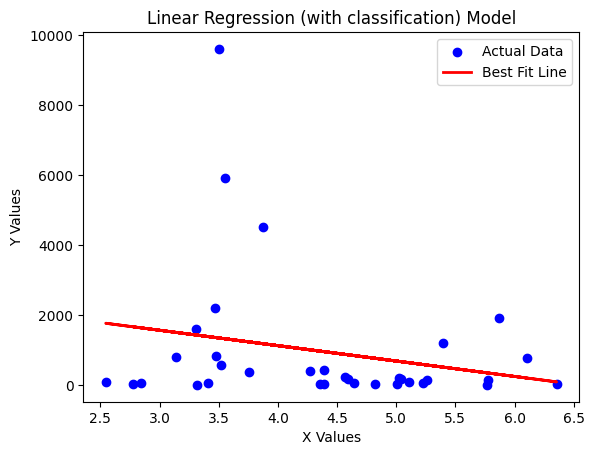

Intercept: 2881.083139737909
Coefficient: -439.6819532630472
Prediction for x=500: -132540.95846528062


In [ ]:
# convert to 0s and 1s
i = 1

# Grab x-values from transposed_df (row (0-2), columns 1 to 60)
x_values = pd.to_numeric(transposed_df.iloc[1, 1:60], errors='coerce').values.reshape(-1, 1)
# Grab y-values from Kd (row i, columns 4 to 64)
y_values = pd.to_numeric(Kd.iloc[i, 4:64], errors='coerce').values

# Create a boolean mask: valid if neither x nor y is NaN and y != 10001
mask = (~np.isnan(x_values.flatten())) & (~np.isnan(y_values)) & (y_values != 10001)

x_filtered = x_values[mask]
y_filtered = y_values[mask]

# Train the Linear Regression model on the filtered data
model = LinearRegression()
model.fit(x_filtered, y_filtered)

# Predictions for the training data
y_pred = model.predict(x_filtered)

# Plot the results
plt.scatter(x_filtered, y_filtered, color="blue", label="Actual Data")
plt.plot(x_filtered, y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Linear Regression (with classification) Model")
plt.legend()
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predict y when x = 500 (convert 500 to a NumPy array and reshape it)
x_new = np.array([308]).reshape(-1, 1)
prediction = model.predict(x_new)
print(f"Prediction for x=500: {prediction[0]}")

In [ ]:
def predict(param, val):
    x_new = np.array([[val]])
    total_prediction = 0

    for j in range(len(models[param])):
        model = models[param][j]
        if model is not None:
            # Predict only if classification_test result <= 0.9
            if classification_test(val, j) <= 0.9:
                pred = model.predict(x_new)
                total_prediction += 1
        else:
            print(f"No model for row {param} and column {j}")

    return total_prediction / 442

print(predict(1, 4))

0.5769230769230769
